In [213]:
# Analysing Premarket watch excel file and building a Strategy

In [214]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
#!pip install talib as ta
#!pip install math

In [215]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib as ta
plt.style.use('fivethirtyeight')

In [216]:
#df1=pd.read_csv('D:\\Python\\Abishek Bhanushali\\Nifty500 list\\ind_nifty500list.csv')
#df1

In [217]:
#df1.count()

In [218]:
!pip install yfinance

In [219]:
import yfinance as yf

In [220]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("RELIANCE.NS", period ="7d", interval="30m")

[*********************100%***********************]  1 of 1 completed


In [221]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-05-21 09:00:00+05:30,1994.000000,2000.000000,1986.050049,1989.400024,1989.400024,231546
2021-05-21 09:30:00+05:30,1989.400024,1993.449951,1987.099976,1993.449951,1993.449951,284121
2021-05-21 10:00:00+05:30,1993.449951,1997.800049,1991.500000,1997.500000,1997.500000,286857
2021-05-21 10:30:00+05:30,1997.699951,2007.800049,1995.000000,2005.250000,2005.250000,650757
2021-05-21 11:00:00+05:30,2005.500000,2009.500000,2002.000000,2003.000000,2003.000000,429825
...,...,...,...,...,...,...
2021-05-31 13:00:00+05:30,2167.800049,2172.699951,2152.000000,2157.449951,2157.449951,1404861
2021-05-31 13:30:00+05:30,2157.100098,2172.699951,2157.100098,2166.100098,2166.100098,1355094
2021-05-31 14:00:00+05:30,2166.850098,2174.899902,2164.199951,2168.000000,2168.000000,805117


In [222]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,2019.425831,2025.499999,2015.074728,2020.789012,2020.789012,9.001605e+05
std,63.640391,66.912869,62.415356,65.356456,65.356456,1.194881e+06
min,1963.699951,1967.900024,1960.250000,1963.500000,1963.500000,1.271570e+05
25%,1977.549988,1979.825012,1974.500000,1977.299988,1977.299988,2.685070e+05
50%,1993.750000,1996.949951,1988.500000,1993.449951,1993.449951,4.236850e+05
75%,2035.574951,2049.974976,2032.625000,2042.325012,2042.325012,9.772365e+05
max,2177.500000,2191.350098,2172.149902,2178.500000,2178.500000,7.631238e+06


In [223]:
#df.skew()

In [224]:
#df.kurtosis()

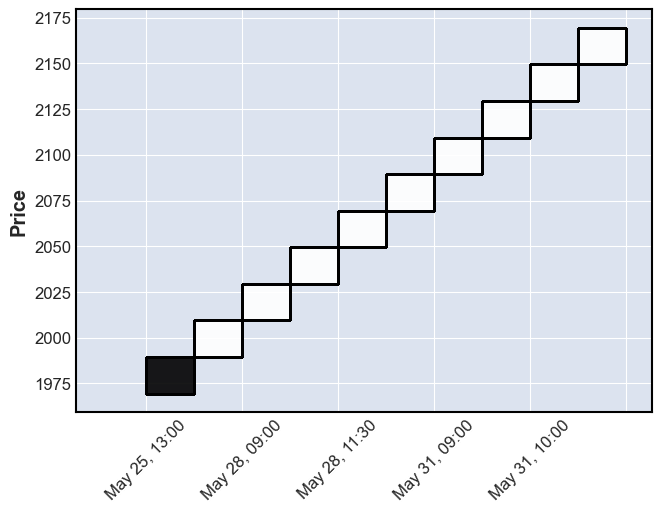

In [225]:
mpf.plot(df,type='renko')

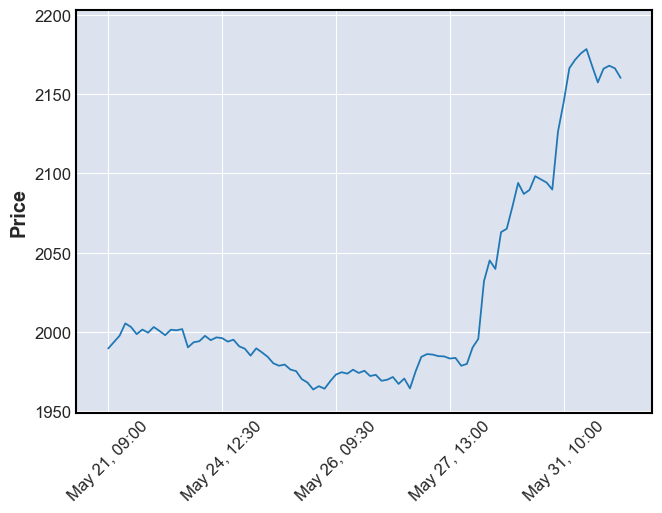

In [226]:
mpf.plot(df,type='line') 

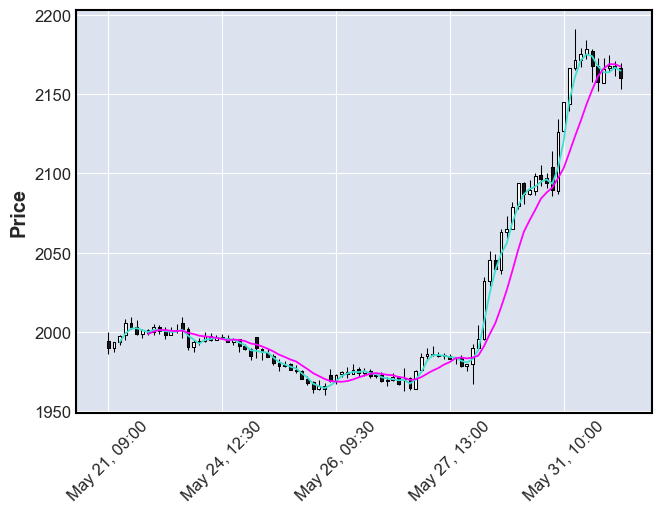

In [227]:
mpf.plot(df,type='candle',mav=(3,8))

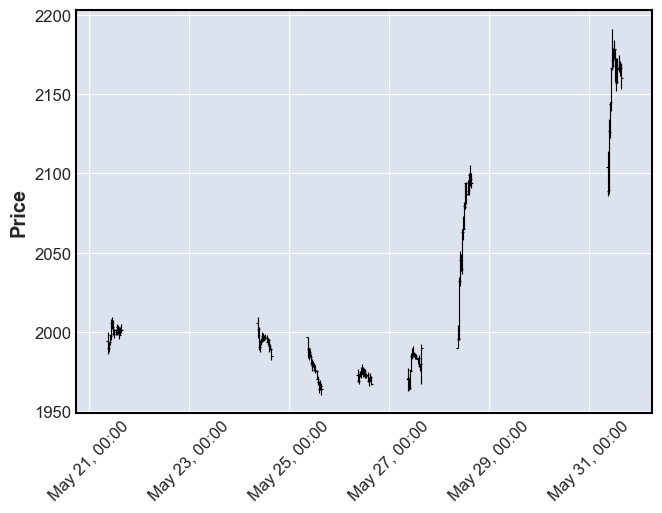

In [228]:
mpf.plot(df,type='ohlc',show_nontrading=True)

In [229]:
#Writing a strategy to code to generate a buy and sell signal as per 3-8 MA and MACD Indicator guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal
# 3. Crosscheck with MACD for 3 candlesticks. If MACD line is above signal line , above o line, buy signal
# 4.  If MACD line is below signal line , below o line, sell signal
# 5.  Stop loss at 1.5 ATR(7 candlesticks)
# 6. Take profit @ 3 ATR
# 7. Chart 5 minutes
# 8. Backtest for 1 year.
# 9. Calculate profits and Sharpe ratio
# 10. Run real time


Text(0.5, 1.0, 'Close Price History')

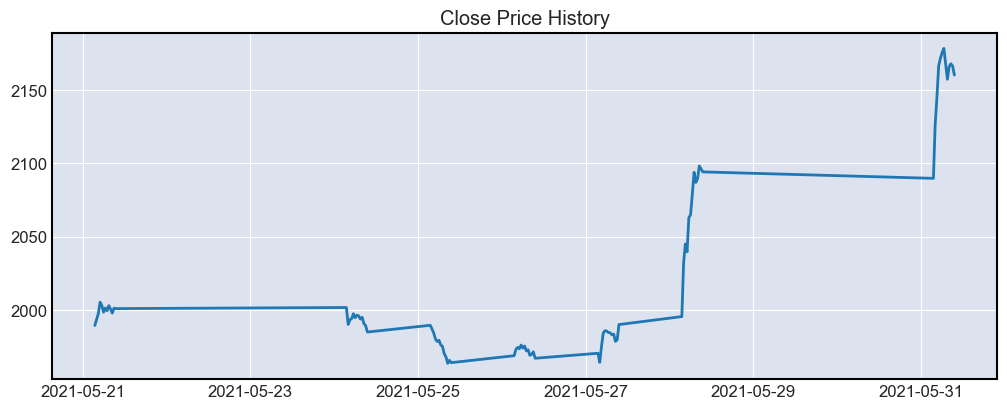

In [230]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label  ='Close')
plt.title('Close Price History')
#plt.xlable('Date')




In [231]:
# Calculate 3 sma and 8 8 sma

ShortEMA = df.Close.ewm(span =12, adjust =False).mean()
LongEMA = df.Close.ewm(span =26, adjust =False).mean()
MACD = ShortEMA - LongEMA
# SIgnal Line
Signal  = MACD.ewm(span =9, adjust =False).mean()

In [232]:
print(type(Signal))

<class 'pandas.core.series.Series'>


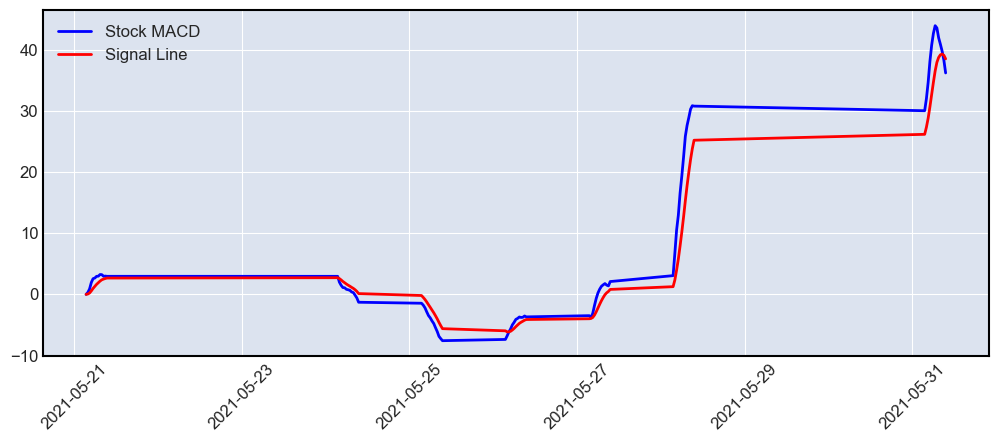

In [233]:
# Plot the chart
plt.figure(figsize =(12.2, 4.5))
plt.plot(MACD, label = "Stock MACD", color ="blue")
plt.plot(Signal, label = "Signal Line", color ="red")
plt.xticks(rotation = 45)
plt.legend(loc ="upper left")
plt.show()

In [234]:
# create a chart, by adding MACD and Signal line too the dataframe
df["MACD"]= MACD
df["Signal Line"] = Signal

In [235]:
MACD

Datetime
2021-05-21 09:00:00+05:30     0.000000
2021-05-21 09:30:00+05:30     0.323071
2021-05-21 10:00:00+05:30     0.895589
2021-05-21 10:30:00+05:30     1.952170
2021-05-21 11:00:00+05:30     2.578241
                               ...    
2021-05-31 13:00:00+05:30    41.985442
2021-05-31 13:30:00+05:30    40.932463
2021-05-31 14:00:00+05:30    39.792571
2021-05-31 14:30:00+05:30    38.314401
2021-05-31 15:00:00+05:30    36.237034
Name: Close, Length: 91, dtype: float64

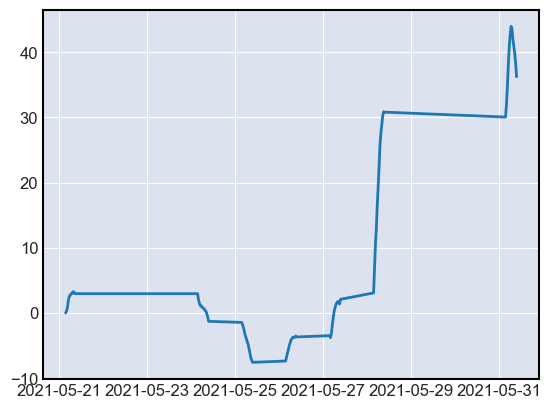

In [236]:
plt.plot(MACD)

In [237]:
Signal

Datetime
2021-05-21 09:00:00+05:30     0.000000
2021-05-21 09:30:00+05:30     0.064614
2021-05-21 10:00:00+05:30     0.230809
2021-05-21 10:30:00+05:30     0.575081
2021-05-21 11:00:00+05:30     0.975713
                               ...    
2021-05-31 13:00:00+05:30    38.772873
2021-05-31 13:30:00+05:30    39.204791
2021-05-31 14:00:00+05:30    39.322347
2021-05-31 14:30:00+05:30    39.120758
2021-05-31 15:00:00+05:30    38.544013
Name: Close, Length: 91, dtype: float64

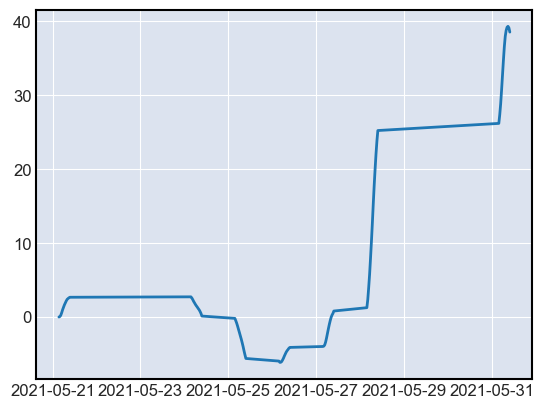

In [238]:
plt.plot(Signal)

In [239]:
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Datetime,,,,,,,,
2021-05-21 09:00:00+05:30,1994.000000,2000.000000,1986.050049,1989.400024,1989.400024,231546,0.000000,0.000000
2021-05-21 09:30:00+05:30,1989.400024,1993.449951,1987.099976,1993.449951,1993.449951,284121,0.323071,0.064614
2021-05-21 10:00:00+05:30,1993.449951,1997.800049,1991.500000,1997.500000,1997.500000,286857,0.895589,0.230809
2021-05-21 10:30:00+05:30,1997.699951,2007.800049,1995.000000,2005.250000,2005.250000,650757,1.952170,0.575081
2021-05-21 11:00:00+05:30,2005.500000,2009.500000,2002.000000,2003.000000,2003.000000,429825,2.578241,0.975713
...,...,...,...,...,...,...,...,...
2021-05-31 13:00:00+05:30,2167.800049,2172.699951,2152.000000,2157.449951,2157.449951,1404861,41.985442,38.772873
2021-05-31 13:30:00+05:30,2157.100098,2172.699951,2157.100098,2166.100098,2166.100098,1355094,40.932463,39.204791
2021-05-31 14:00:00+05:30,2166.850098,2174.899902,2164.199951,2168.000000,2168.000000,805117,39.792571,39.322347


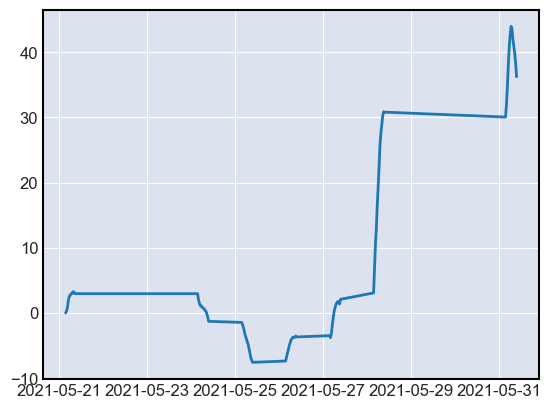

In [240]:
plt.plot(df["MACD"], data=df)


In [241]:
# Create a function, when to buy and sell an asset

def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0,len(signal)):
        if signal["MACD"][i] >= signal["Signal Line"][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Close"][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal["MACD"][i] == signal["Signal Line"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal["Close"][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)

In [242]:
# Create Buy and sell column
a= buy_sell(df)
df["Buy_Signal_Price"] = a[0] 
df["Sell_Signal_Price"]= a[1]

In [243]:
print(type(a))

<class 'tuple'>


In [244]:
df.tail(13)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Datetime,,,,,,,,,,
2021-05-31 09:00:00+05:30,2103.949951,2114.350098,2085.600098,2089.800049,2089.800049,790683,30.055666,26.193699,NaN,NaN
2021-05-31 09:30:00+05:30,2089.100098,2134.600098,2087.000000,2126.350098,2126.350098,3355317,32.037899,27.362539,NaN,NaN
2021-05-31 10:00:00+05:30,2126.500000,2144.949951,2122.250000,2144.949951,2144.949951,1740754,34.709576,28.831947,NaN,NaN
2021-05-31 10:30:00+05:30,2144.000000,2166.699951,2139.100098,2166.449951,2166.449951,2980990,38.122319,30.690021,NaN,NaN
2021-05-31 11:00:00+05:30,2166.850098,2191.350098,2165.000000,2171.699951,2171.699951,5079302,40.780481,32.708113,NaN,NaN
2021-05-31 11:30:00+05:30,2171.850098,2179.300049,2167.449951,2175.699951,2175.699951,1487606,42.717441,34.709979,NaN,NaN
2021-05-31 12:00:00+05:30,2175.550049,2184.000000,2172.149902,2178.500000,2178.500000,1024364,43.971559,36.562295,NaN,NaN
2021-05-31 12:30:00+05:30,2177.500000,2178.750000,2157.600098,2167.800049,2167.800049,1240510,43.599472,37.969730,NaN,NaN
2021-05-31 13:00:00+05:30,2167.800049,2172.699951,2152.000000,2157.449951,2157.449951,1404861,41.985442,38.772873,NaN,NaN


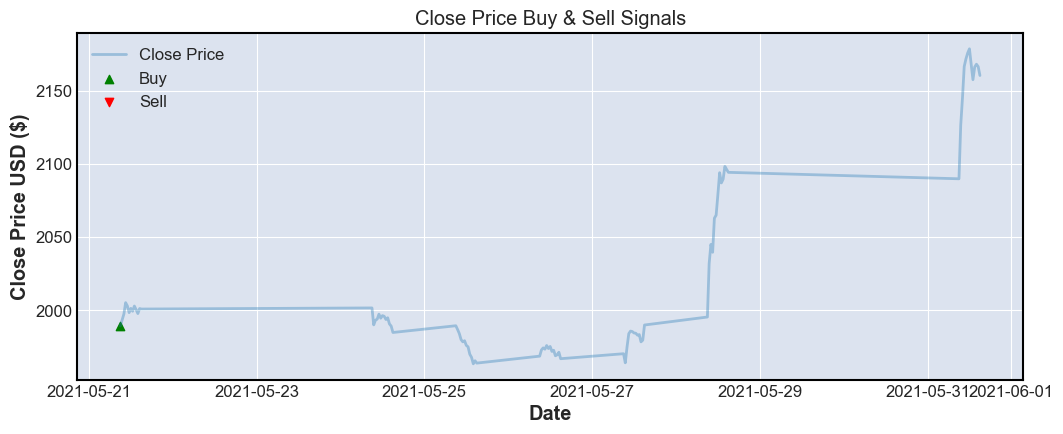

In [245]:
# Visoally show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter( df.index,df["Buy_Signal_Price"], color = "green", label ="Buy", marker = "^", alpha =1)
plt.scatter( df.index,df["Sell_Signal_Price"], color = "red", label ="Sell", marker = "v", alpha =1)
plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
plt.title("Close Price Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel('Close Price USD ($)')
plt.legend(loc= "upper left")
plt.show()

In [246]:
# End